In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [76]:
from mapper_class import *

In [3]:
# data=data_container('/tigress/changgoo/MHD_4pc_new/id0/MHD_4pc_new.0360.vtk',)

In [88]:
%%time
data=data_container('/tigress/changgoo/R8_2pc_rst/id0/R8_2pc_rst.0350.vtk',
                    '/tigress/jk11/radps_postproc/R8_2pc_rst.xymax1024/vtk/id0/R8_2pc_rst.0066.vtk')

350.0004 350.0004


In [4]:
# %%time
# data=data_container('/tigress/changgoo/R8_4pc_newacc/id0/R8_4pc_newacc.0350.vtk',
#                     '/tigress/jk11/radps_postproc/R8_4pc_newacc.xymax1024/vtk/R8_4pc_newacc.0251.vtk')

350.0005 350.0005
CPU times: user 53.6 ms, sys: 59.1 ms, total: 113 ms
Wall time: 4.5 s


In [89]:
%%time
data.prepare_data(load=False,dump=False)

CPU times: user 5min 39s, sys: 2min 11s, total: 7min 51s
Wall time: 8min 35s


In [6]:
# %%time
# data.prepare_data(load=True,dump=False)

CPU times: user 1.79 ms, sys: 1.96 s, total: 1.96 s
Wall time: 2.06 s


In [47]:
%%time
for dm in ['MBB','HD']:
    for freq in [150,217,353]:
        data._set_dust_model(dm)
        data.calc_Snu(freq,load=False)

CPU times: user 6min 2s, sys: 44.9 s, total: 6min 47s
Wall time: 6min 48s


In [46]:
%%time
data.calc_Snu(353,load=False)

CPU times: user 12.2 s, sys: 11 s, total: 23.2 s
Wall time: 23.3 s


In [16]:
import matplotlib.pyplot as plt

In [48]:
import pyathena as pa

(0.0, 1.0, 0.0, 1.0)

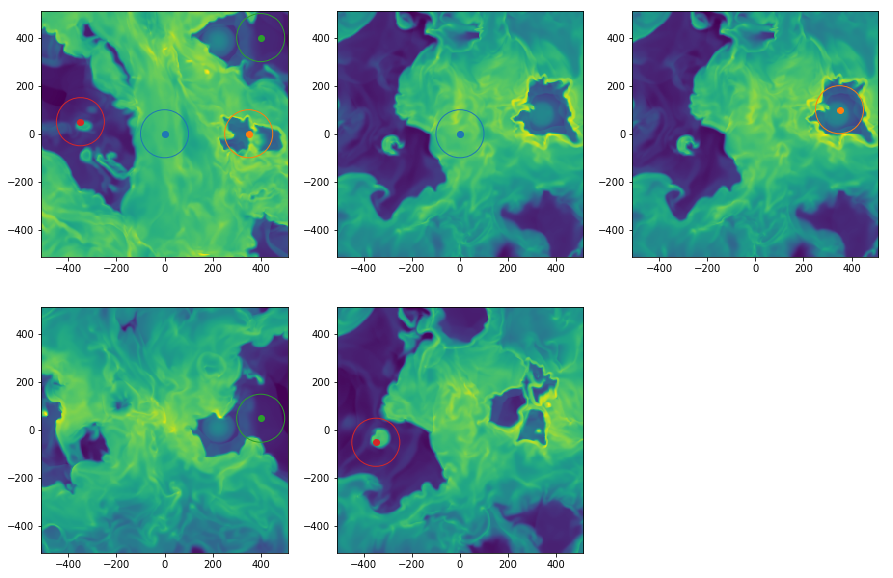

In [72]:
obspos=[[0,0,0],[350,0,100],[400,400,50],[-350,50,-50]]
losmin=100
fig,axes = plt.subplots(2,3,figsize=(15,10))
axes=axes.flatten()
plt.sca(axes[0])
plt.imshow(np.log10(data.nH[896,:,:]),extent=[-512,512,-512,512],origin='lower')
for n,pos in enumerate(obspos):
    x,y,z=pos
    i,j,k=(pa.cc_idx(data.dsmhd.domain,pos)).astype('int')
    
    plt.sca(axes[0])
    p,=plt.plot(x,y,'o')
    circ=plt.Circle([x,y],losmin,fill=None,color=p.get_color(),clip_on=False)
    plt.gca().add_artist(circ)

    plt.sca(axes[n+1])
    plt.imshow(np.log10(data.nH[896-128:896+128,j,:]),extent=[-512,512,-512,512],origin='lower')
    p,=plt.plot(x,z,'o',color=p.get_color())
    circ=plt.Circle([x,z],losmin,fill=None,color=p.get_color(),clip_on=False)
    plt.gca().add_artist(circ)
axes[-1].axis('off')

In [75]:
%%time
ds=data.dsmhd
for dm in ['MBB','HD']:
    for freq in [150,217,353]:
        data._set_dust_model(dm)
        data.calc_Snu(freq,load=True)
        tomap=mapper(data)
        tomap.freq=freq
        tomap.minlos=100
        obspos=[[0,0,0],[350,0,100],[400,400,50],[-350,50,-50]]
        for n,pos in enumerate(obspos):
            for nside in [128,256]:
                tomap.nside=nside
                tomap.run_mapper(obspos=pos)
                x,y,z=pos
                fileinfo=dict(pid=ds.id,step=ds.step,nside=nside,freq=freq,dust=dm,x=x,y=y,z=z)
                tomap.write_map(fileinfo)


maps/R8_4pc_newacc.0350.N128.f150.MBB.x0y0z0.IQU.fits
maps/R8_4pc_newacc.0350.N256.f150.MBB.x0y0z0.IQU.fits
maps/R8_4pc_newacc.0350.N128.f150.MBB.x350y0z100.IQU.fits
maps/R8_4pc_newacc.0350.N256.f150.MBB.x350y0z100.IQU.fits
maps/R8_4pc_newacc.0350.N128.f150.MBB.x400y400z50.IQU.fits
maps/R8_4pc_newacc.0350.N256.f150.MBB.x400y400z50.IQU.fits
maps/R8_4pc_newacc.0350.N128.f150.MBB.x-350y50z-50.IQU.fits
maps/R8_4pc_newacc.0350.N256.f150.MBB.x-350y50z-50.IQU.fits
maps/R8_4pc_newacc.0350.N128.f217.MBB.x0y0z0.IQU.fits
maps/R8_4pc_newacc.0350.N256.f217.MBB.x0y0z0.IQU.fits
maps/R8_4pc_newacc.0350.N128.f217.MBB.x350y0z100.IQU.fits
maps/R8_4pc_newacc.0350.N256.f217.MBB.x350y0z100.IQU.fits
maps/R8_4pc_newacc.0350.N128.f217.MBB.x400y400z50.IQU.fits
maps/R8_4pc_newacc.0350.N256.f217.MBB.x400y400z50.IQU.fits
maps/R8_4pc_newacc.0350.N128.f217.MBB.x-350y50z-50.IQU.fits
maps/R8_4pc_newacc.0350.N256.f217.MBB.x-350y50z-50.IQU.fits
maps/R8_4pc_newacc.0350.N128.f353.MBB.x0y0z0.IQU.fits
maps/R8_4pc_newacc.035

In [86]:
import cmocean

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


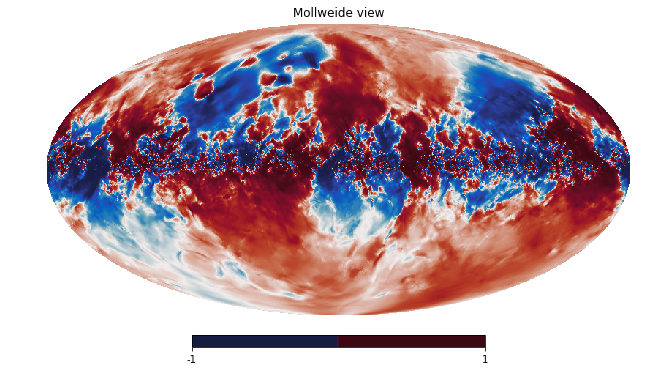

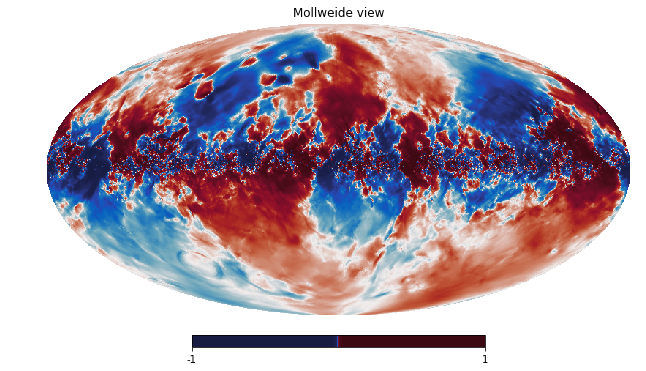

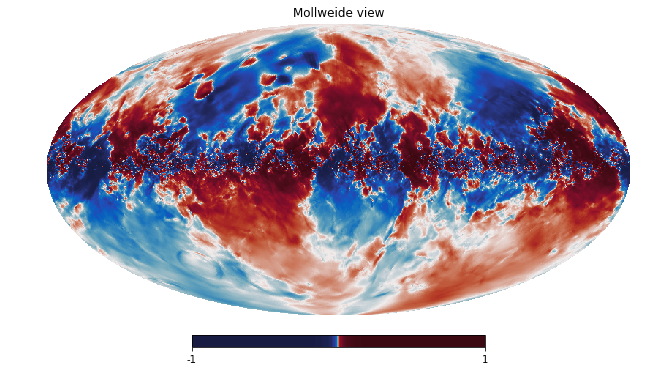

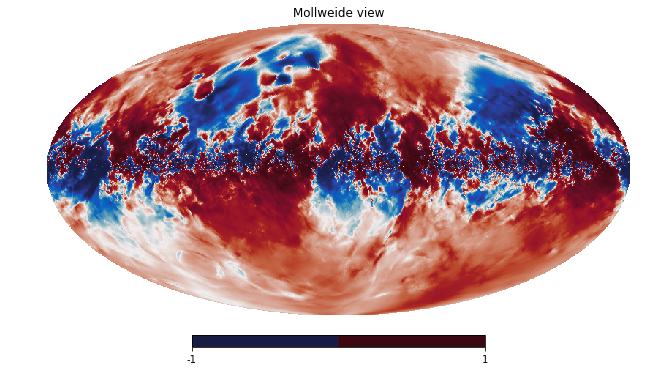

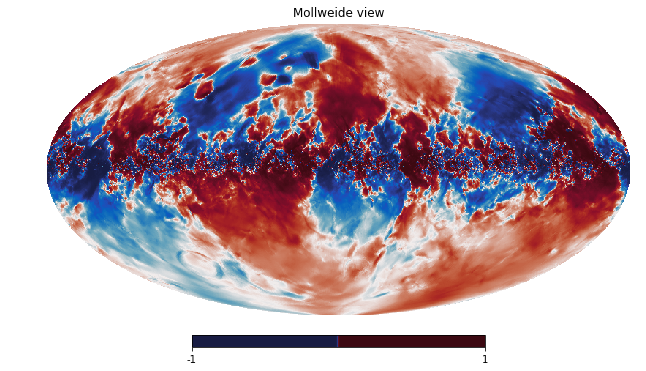

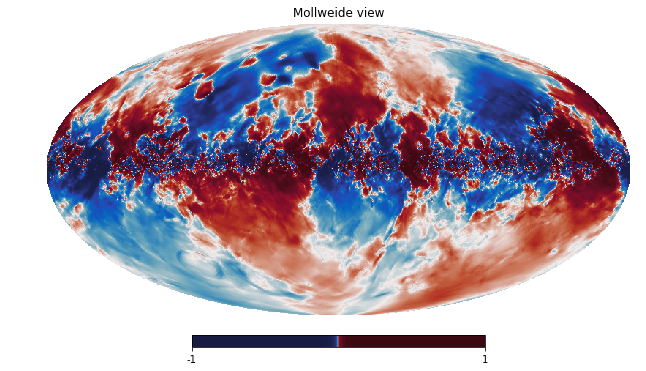

In [87]:
for dm in ['MBB','HD']:
    for freq in [150,217,353]:
        fileinfo=dict(pid=ds.id,step=ds.step,nside=nside,freq=freq,dust=dm,x=x,y=y,z=z)
        fname=get_mapfilename(fileinfo)

        I,Q,U=hp.read_map(fname,field=[0,1,2])

        hp.mollview(U,norm='hist',cmap=cmocean.cm.balance,min=-1,max=1)

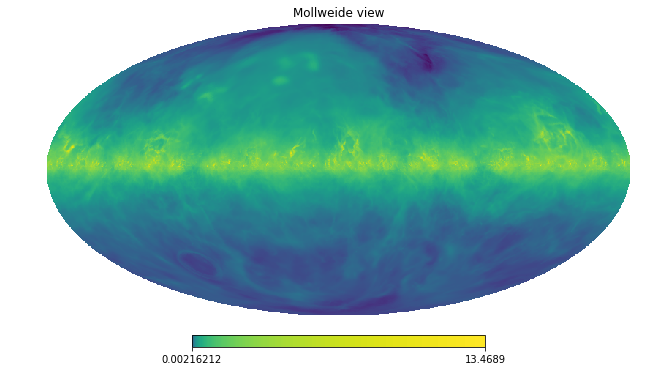

In [82]:
import healpy as hp
hp.mollview(I,norm='log')

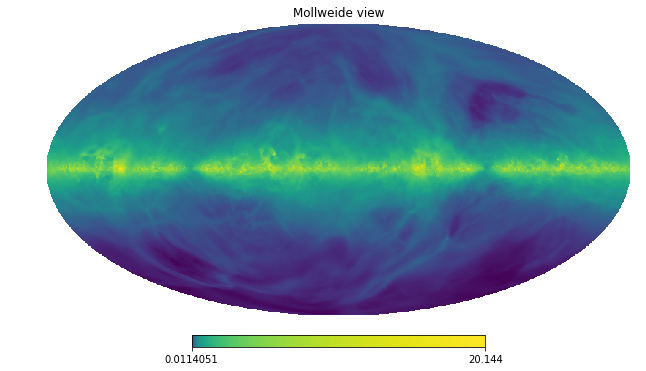

In [23]:
hp.mollview(IQU[0],norm='log')

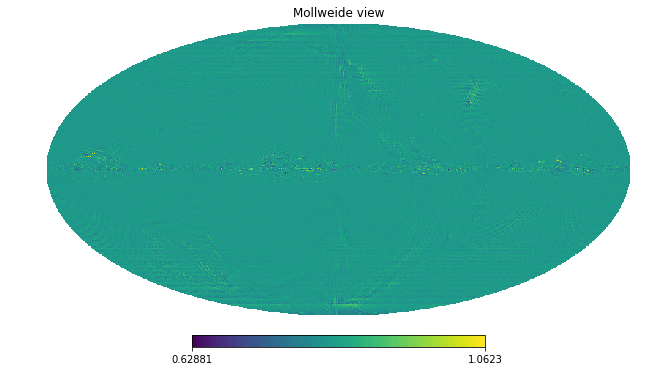

In [27]:
hp.mollview(IQU[0]/tomap.I,norm='log')

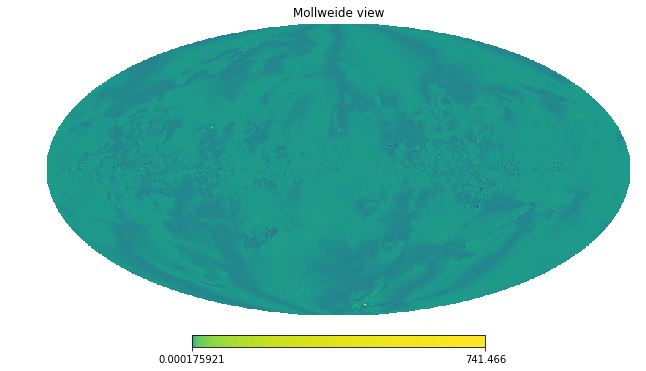

In [36]:
hp.mollview((IQU[1]**2+IQU[2]**2)/(tomap.Q**2+tomap.U**2),norm='log')

In [38]:
import cmocean

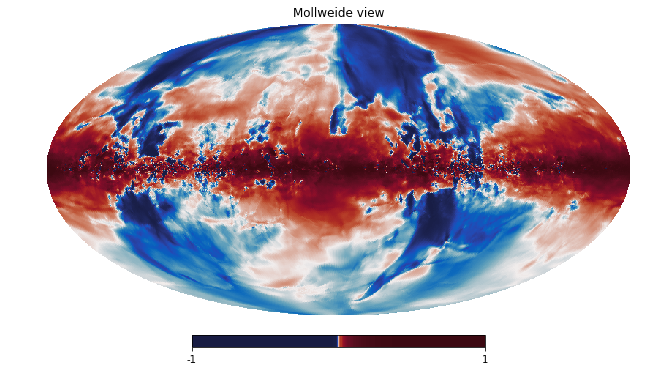

In [41]:
hp.mollview(IQU[1],norm='hist',cmap=cmocean.cm.balance,min=-1,max=1)

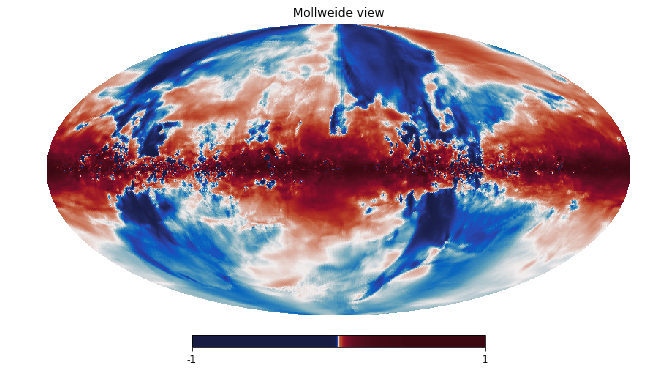

In [42]:
hp.mollview(tomap.Q,norm='hist',cmap=cmocean.cm.balance,min=-1,max=1)

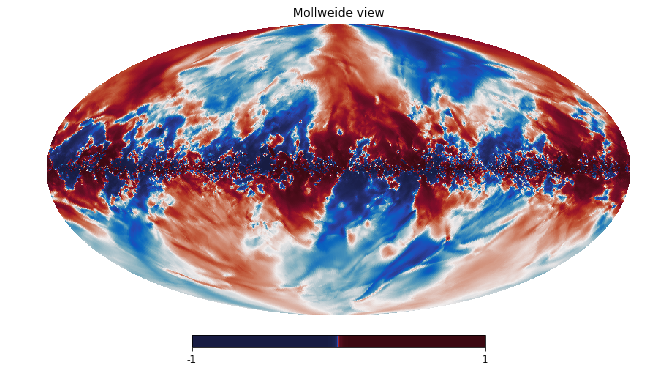

In [43]:
hp.mollview(IQU[2],norm='hist',cmap=cmocean.cm.balance,min=-1,max=1)

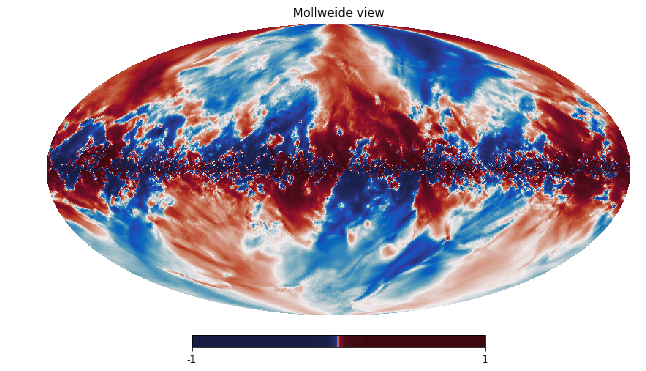

In [45]:
hp.mollview(-tomap.U,norm='hist',cmap=cmocean.cm.balance,min=-1,max=1)